# Caminantes aleatorios en una red triangular

In [1]:
import numpy as np
import numpy.random as nr
import time 


In [2]:
def caminantehex(Caminantes,Pasos):
    dir = np.random.randint(6, size=(Caminantes, Pasos))
    dx = np.zeros((Caminantes, Pasos),dtype = "float")
    dy = np.zeros((Caminantes, Pasos),dtype = "float")

    dx[dir==0],dx[dir==1],dx[dir==2],dx[dir==3],dx[dir==4],dx[dir==5]=0.5,1,0.5,-0.5,-1,-0.5
    dy[dir==0],dy[dir==1],dy[dir==2],dy[dir==3],dy[dir==4],dy[dir==5]=0.86603,0,-0.86603,-0.86603,0,0.86603

    X,Y  = np.cumsum(dx,axis=1),np.cumsum(dy,axis=1)
    
    XparaN = X[:,Pasos-1]
    YparaN = Y[:,Pasos-1]

    Xmean, Ymean = np.mean(X,axis = 0),np.mean(Y,axis = 0)

    R2 = ((X*X).mean(axis=0)-Xmean**2) + ((Y*Y).mean(axis=0)-Ymean**2)
    

    return R2, Xmean, Ymean, XparaN, YparaN

In [3]:
startTime = time.process_time()
caminantes, pasos = 20000, 1000
R2,Xmean,Ymean,XparaN,YparaN = caminantehex(caminantes,pasos)
endTime = time.process_time()
print('Duración= {} s.'.format(endTime-startTime))

Duración= 2.7553160000000005 s.


In [4]:
def lineFit(x, y):
    xavg = np.mean(x)
    slope = (y * (x - xavg)).sum() / (x * (x - xavg)).sum()
    yint = np.mean(y) - slope * xavg
    return slope, yint

In [5]:
import matplotlib.pyplot as plt

1.0001665901666963


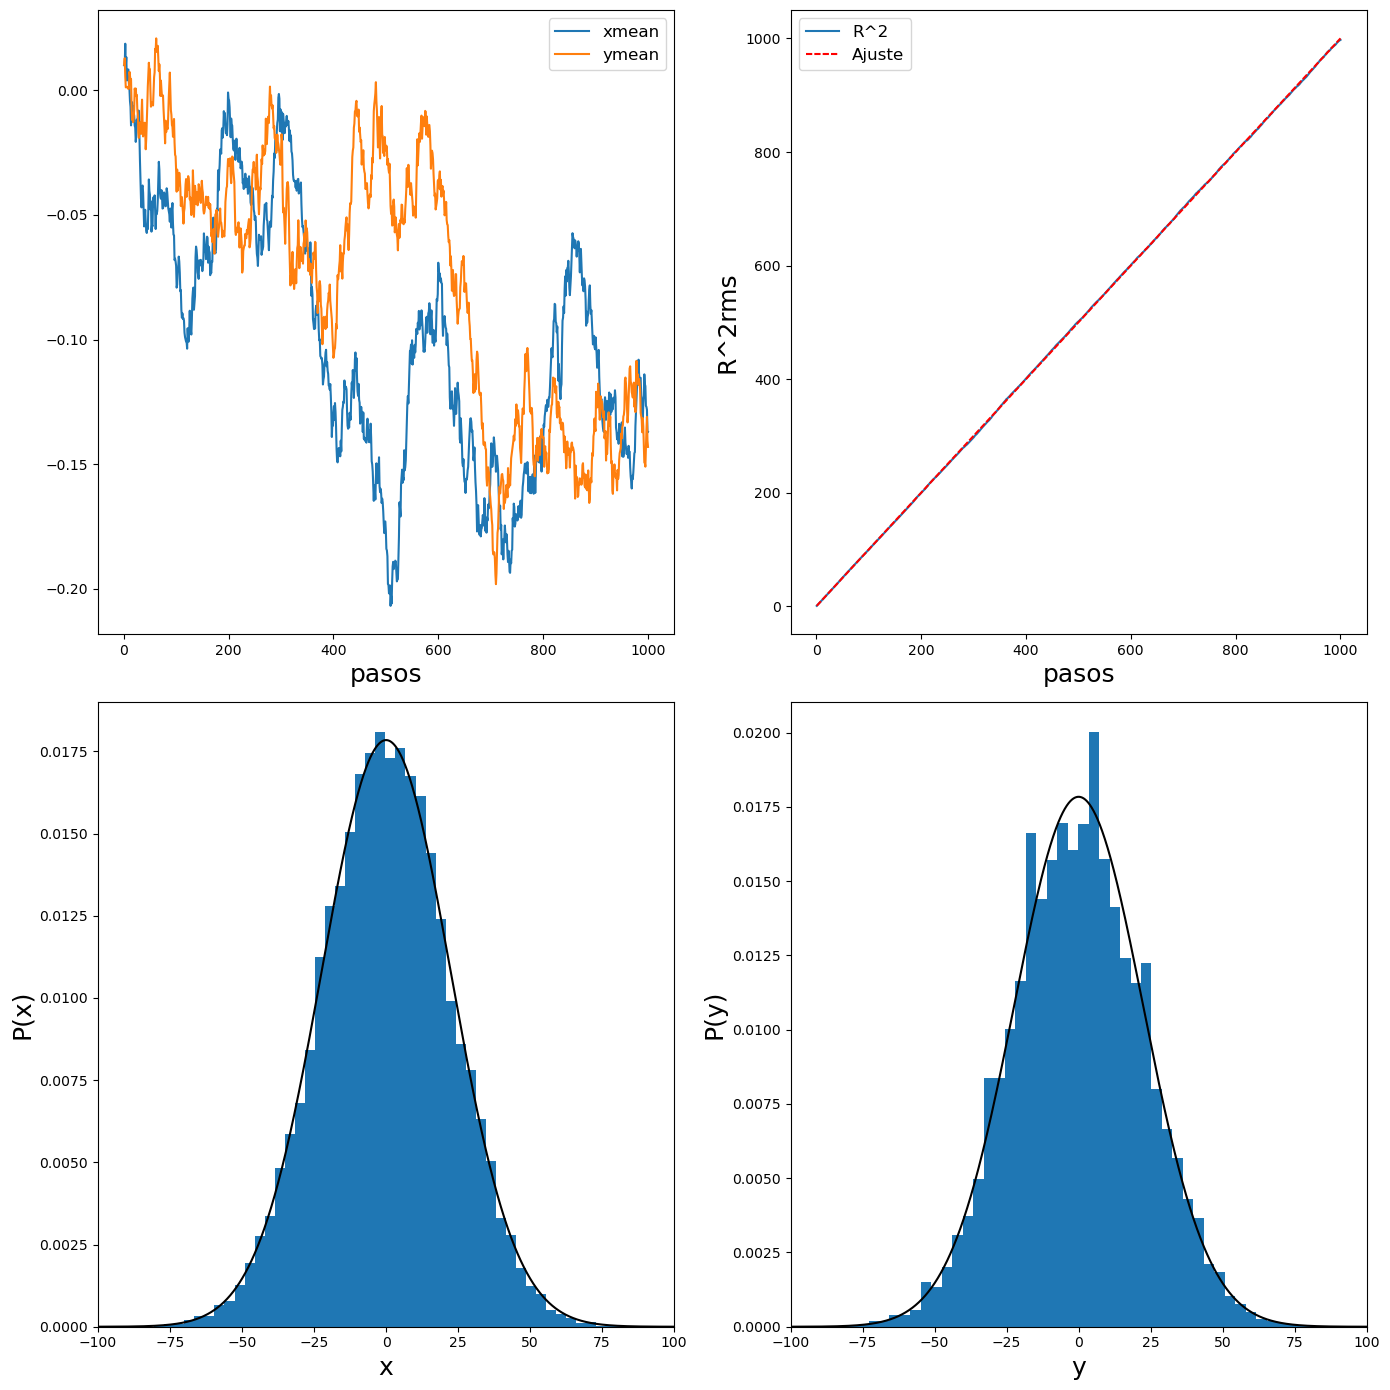

In [6]:
#Gráfica de los pasos vs X y Y mean
Ngraf = np.arange(1,pasos+1)
fig = plt.figure(figsize = (14,14))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(Ngraf,Xmean,label = "xmean")
ax1.plot(Ngraf,Ymean,label = "ymean")
ax1.legend(loc = 'best',fontsize = 12)
ax1.set_xlabel("pasos",fontsize = 18)

#Gráfica de los pasos vs R^2
ax2 = fig.add_subplot(2,2,2)
slope, corte = lineFit(Ngraf,R2)
ajuste = slope*Ngraf + corte
ax2.plot(Ngraf,R2,label = "R^2")
ax2.plot(Ngraf,ajuste,color = 'red',dashes = (3,1),label = "Ajuste")
ax2.legend(loc = 'best',fontsize = 12)
ax2.set_xlabel("pasos",fontsize = 18)
ax2.set_ylabel("R^2rms",fontsize = 18)
print(slope)


#Gráfica de x vs P(x)
ax3 = fig.add_subplot(2,2,3)

ax3.set_xlabel("x",fontsize = 18)
ax3.set_ylabel("P(x)",fontsize = 18)
n, bins, patches = plt.hist(XparaN, bins = 50,density = True) # density = True, funcion de distribucion
x = np.arange(-400,400,0.1)
Prob = np.exp(-x**2/(2*pasos/2))/np.sqrt(np.pi*2*pasos/2)
ax3.set_xlim(-100,100)
ax3.plot(x,Prob,color = 'black')

#Gráfica de y vs p(y)
ax4 = fig.add_subplot(2,2,4)

ax4.set_xlabel("y",fontsize = 18)
ax4.set_ylabel("P(y)",fontsize = 18)
n, bins, patches = plt.hist(YparaN, bins = 50,density = True) # density = True, funcion de distribucion
x = np.arange(-400,400,0.1)
Prob = np.exp(-x**2/(2*pasos/2))/np.sqrt(np.pi*2*pasos/2)
ax4.set_xlim(-100,100)
ax4.plot(x,Prob,color = 'black')

fig.tight_layout()

# Cálculo de v

v=  0.5006887420613108
log(A)=  -0.004244913076853596


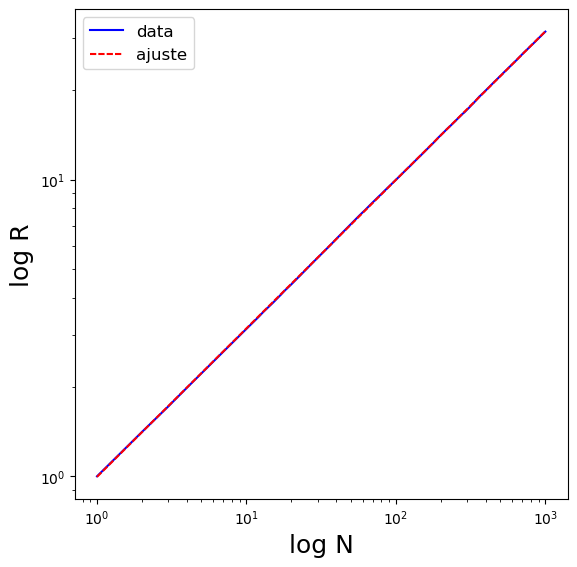

In [7]:
#Calculamos v de R=A(N^v) -----> ln(R)=ln(A)+vln(N)

logR = np.log(R2**0.5)
logN = np.log(Ngraf)
fig = plt.figure(figsize = (14,14))

ax5 = fig.add_subplot(2,2,2)
slope, corte = lineFit(logN,logR)
ajuste = slope*logN + corte
ax5.loglog(Ngraf,R2**0.5,'b',label = r'data')
ax5.loglog(Ngraf,np.exp(ajuste),color = 'red',dashes = (3,1),label = "ajuste")
ax5.legend(loc = 'best',fontsize = 12)
ax5.set_xlabel("log N",fontsize = 18)
ax5.set_ylabel("log R",fontsize = 18)
print("v= ",slope)
print("log(A)= ",corte)

# Caminantes aleatorios libres

In [8]:
def caminantelibre(Caminantes,Pasos):
    dir = np.random.randint(361, size=(Caminantes, Pasos))
    dx = np.zeros((Caminantes, Pasos),dtype = "float")
    dy = np.zeros((Caminantes, Pasos),dtype = "float")

    dx=np.cos(dir)
    dy=np.sin(dir)

    X,Y  = np.cumsum(dx,axis=1),np.cumsum(dy,axis=1)

    Xmean, Ymean = np.mean(X,axis = 0),np.mean(Y,axis = 0)

    R = ((X*X).mean(axis=0)-Xmean**2) + ((Y*Y).mean(axis=0)-Ymean**2)

    return R, Xmean, Ymean, X, Y

In [9]:
startTime = time.process_time()
caminantes1, pasos1 = 20000, 1000
R21,Xmean1,Ymean1,XparaN1,YparaN1 = caminantelibre(caminantes1,pasos1)
endTime = time.process_time()
print('Duración= {} s.'.format(endTime-startTime))

Duración= 2.2286779999999995 s.


1.0001665901666963


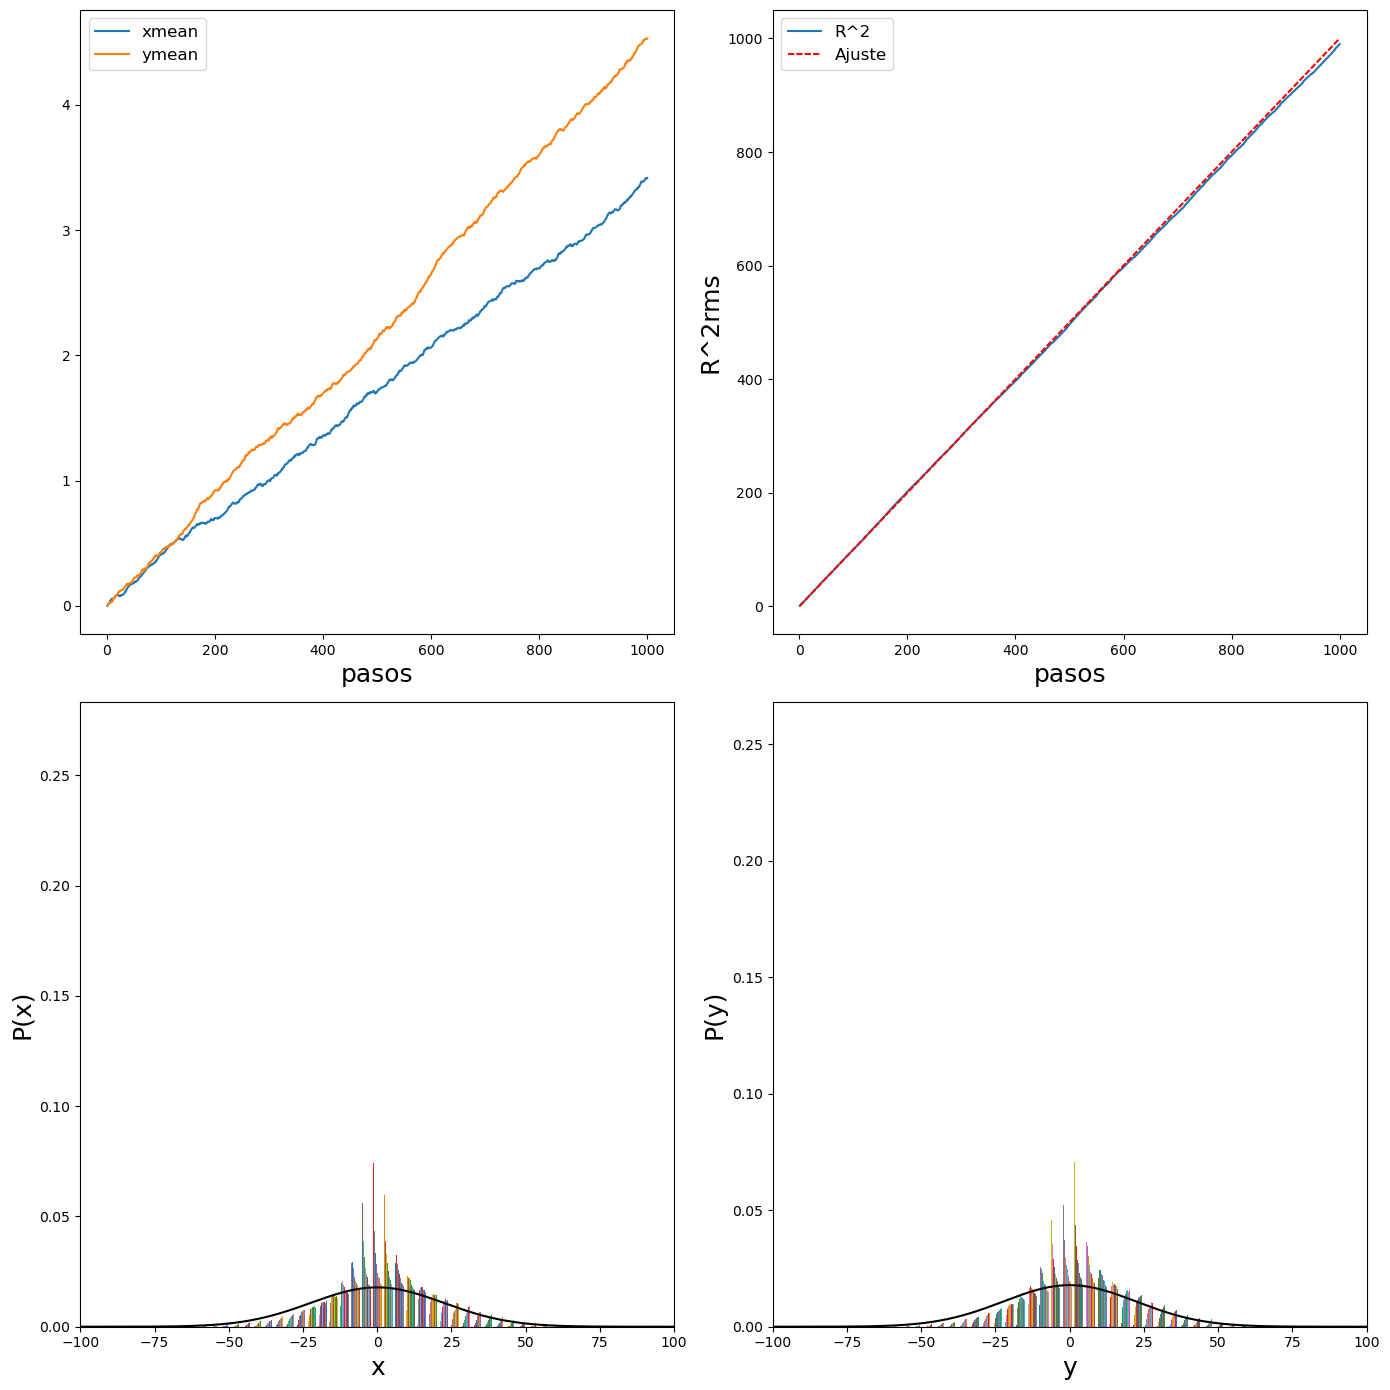

In [10]:
Ngraf1 = np.arange(1,pasos1+1)
fig = plt.figure(figsize = (14,14))
ax1 = fig.add_subplot(2,2,1)
ax1.plot(Ngraf1,Xmean1,label = "xmean")
ax1.plot(Ngraf1,Ymean1,label = "ymean")
ax1.legend(loc = 'best',fontsize = 12)
ax1.set_xlabel("pasos",fontsize = 18)

ax2 = fig.add_subplot(2,2,2)
slope, corte = lineFit(Ngraf,R2)
ajuste = slope*Ngraf1 + corte
ax2.plot(Ngraf1,R21,label = "R^2")
ax2.plot(Ngraf1,ajuste,color = 'red',dashes = (3,1),label = "Ajuste")
ax2.legend(loc = 'best',fontsize = 12)
ax2.set_xlabel("pasos",fontsize = 18)
ax2.set_ylabel("R^2rms",fontsize = 18)
print(slope)

ax3 = fig.add_subplot(2,2,3)

ax3.set_xlabel("x",fontsize = 18)
ax3.set_ylabel("P(x)",fontsize = 18)
n, bins, patches = plt.hist(XparaN1, bins = 50,density = True) # density = True, funcion de distribucion
x = np.arange(-400,400,0.1)
Prob = np.exp(-x**2/(2*pasos1/2))/np.sqrt(np.pi*2*pasos1/2)
ax3.set_xlim(-100,100)
ax3.plot(x,Prob,color = 'black')


ax4 = fig.add_subplot(2,2,4)

ax4.set_xlabel("y",fontsize = 18)
ax4.set_ylabel("P(y)",fontsize = 18)
n, bins, patches = plt.hist(YparaN1, bins = 50,density = True) # density = True, funcion de distribucion
x = np.arange(-400,400,0.1)
Prob = np.exp(-x**2/(2*pasos1/2))/np.sqrt(np.pi*2*pasos1/2)
ax4.set_xlim(-100,100)
ax4.plot(x,Prob,color = 'black')

fig.tight_layout()